In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [4]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    x_train = np.delete(x, k_indices[k])
    x_test = x[k_indices[k]]
    y_train = np.delete(y, k_indices[k])
    y_test = y[k_indices[k]]
    #print(y_test.shape)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    poly_train = build_poly(x_train, degree)
    poly_test = build_poly(x_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************

    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression with a given lambda
    # ***************************************************
    weights, mse_tr = ridge_regression(y_train, poly_train, lambda_)
    mse_te = compute_mse(y_test, poly_test, weights)
    loss_tr = (np.sqrt(2*mse_tr))
    loss_te = (np.sqrt(2*mse_te))
    # print("proportion={p}, degree={d}, lambda={l:.5f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(p=k, d=degree, l=lambda_, tr=loss_tr, te=loss_te))


    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    return loss_tr, loss_te

2
3
4
5
6
7
8
9
10
[(0.5308556745298165, 0.0017433288221999873), (0.2956163089369284, 0.0003562247890262444), (0.2895144645252672, 0.0012689610031679222), (0.2917128674590817, 0.02212216291070448), (0.30265345388735687, -inf), (0.2876550388346475, 0.004520353656360241), (0.29585320119168385, 0.011721022975334805), (0.29776850010533407, 0.01610262027560939), (0.2967897851984911, 0.011721022975334805)]


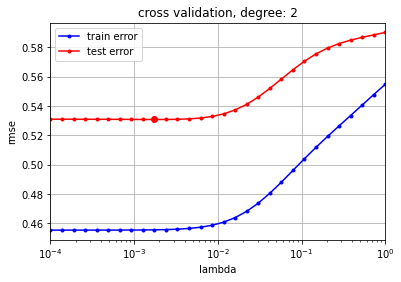

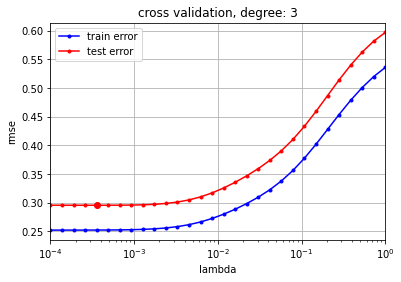

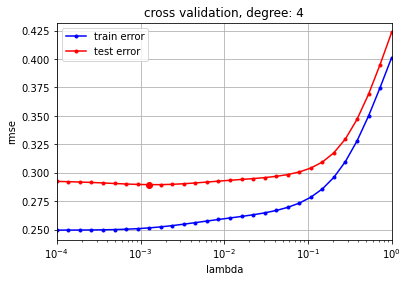

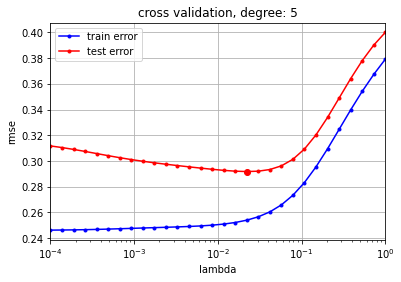

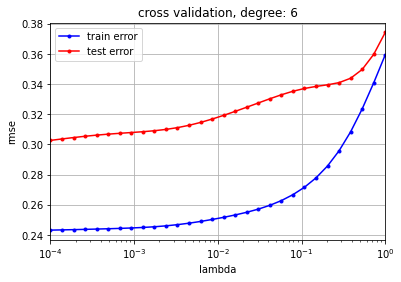

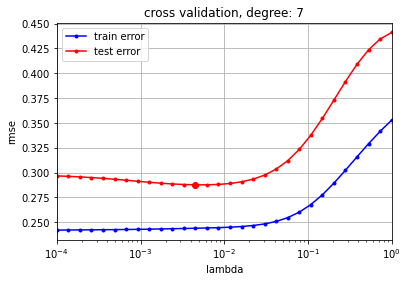

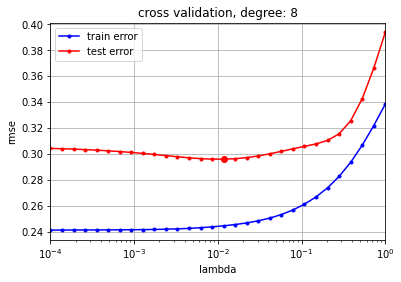

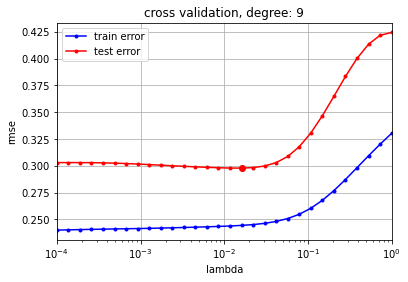

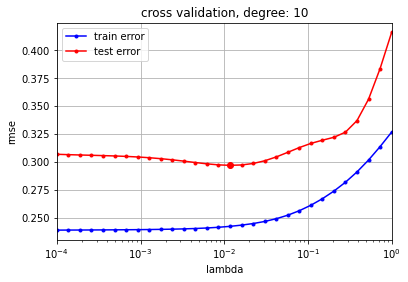

In [27]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degrees = range(2, 11)
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data

    rmse_tr_deg = []
    rmse_te_deg = []
    best_deg = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    for degree in degrees:
        print(degree)
        rmse_tr = []
        rmse_te = []
        best_l = - np.infty
        best_mse = 0
        for lambda_ in lambdas:
            rmse_tr_k, rmse_te_k = 0, 0
            for k in range(k_fold):
                rmse_tr_kc, rmse_te_kc = cross_validation(y, x, k_indices, k, lambda_, degree)
                rmse_tr_k += rmse_tr_kc
                rmse_te_k += rmse_te_kc
            rmse_tr.append(rmse_tr_k/k_fold)
            rmse_te.append(rmse_te_k/k_fold)
            if len(rmse_te) > 1 and rmse_te_k/k_fold < min(rmse_te[:-1]):
                best_l = lambda_
                best_mse = rmse_te_k/k_fold

        best_deg.append((min(rmse_te),best_l))

    # ***************************************************    
        cross_validation_visualization(lambdas, rmse_tr, rmse_te, degree, best_l, best_mse)
    print(best_deg)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [9]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        raise NotImplementedError

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()

NotImplementedError: 